# Exploring Machine Learning

In this notebook, we will explore ways to analyze data, build models, and apply predictions on data corresponding to financial accounts. The idea is to grasp how machine learning works and evaluate its uses on financial systems.

Here are the questions that we will try to answer during this experiment:

- *What is the percentage of having a downward or upward sales for the next business year?*

---
# Initializing required libraries 

Here are the list of essential libraries used for building machine learning models and implementing predictions :

- **Tensorflow** - *An open source software library used for conducting machine learning and deep neural networks research.*

- **Numpy** - *An open source package for python used for scientific computing that supports large, multidimensional arrays and matrices, and is mainly used for data analysis.*

- **Pandas** - *An open source library aimed to be the fundamental high-level building block for doing practical, real world data analysis in Python, and is mainly used for data manipulation and analysis.*

- **Seaborn** - *An open source library for data visualization which provides a high-level interface for drawing attractive and informative statistical graphics.*

In [202]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import shutil

print("TensorFlow v" + tf.__version__)
print("Numpy v" + np.__version__)
print("Pandas v" + pd.__version__)

TensorFlow v1.10.1
Numpy v1.14.5
Pandas v0.23.4


---
# Extraction of sample data

On this part we will discuss ways on how to extract a sample of data to be analyzed. In this experiment though, we will be using an already exported CSV file of the dataset instead. For inquiries on how will the flow be when getting dataset by utilizing BigQuery, below are the sample flows :

In [203]:
# import google.datalab.bigquery as bq
    
# base_query = """
# 	select something from data source where something = PARAMS
# """

# query = base_query.replace("PARAMS", "params_value")

# result = bq.Query(query).execute().result().to_dataframe()

For a more complex example which splits query creation into different phases of machine learning data extraction and analysis see below code :

In [204]:
# def sample_between(start, end) :
# 	base_query = """
# 		select something from source where fixed conditions are met
# 	"""

# 	conditional_sampling_a = "and where condition respects PARAMS"
# 	conditional_sampling_b = "and where condition is somewhere within {0} and {1}".format(start, end)

# 	return "{} \n {} \n {}".format(base_query, conditional_sampling_a, conditional_sampling_b)

# def create_query(phase, params_value) :
# 	# Phases : 
# 	# 	train - 70% of data
# 	# 	valid - 15% of data
# 	# 	test - 15% of data
# 	query = ""

# 	if phase == 'train' :
# 		query = sample_between(0, 70)
# 	elif phase == 'valid' :
# 		query sample_between(70, 85)
# 	else :
# 		query = sample_between(85, 100)

# 	query.replace("PARAMS", str(params_value))
	
# 	result = bq.Query(query).execute().result().to_dataframe()

Another example consist of finding a baseline **(alpha)** for a formulated column which will be used to serve the Root-Mean-Square error **(RMSE)**,
*a frequently used measurement of the differences between values predicted by a model or an estimator and the values observed* :

In [205]:
# import google.datalab.bigquery as bq

# def compute_alpha(params_value) :
# 	base_query = """
# 		select computed alpha column from source where fixed conditions are met
# 	"""

# 	conditional_sampling_a = "and where condition respects PARAMS"
# 	conditional_sampling_b = "and where condition is somewhere within all covered ranges"

# 	query = "{} \n {} \n {}".format(base_query, conditional_sampling_a, conditional_sampling_b)
# 	query.replace("PARAMS", str(params_value))

# 	results = bq.Query(query).execute().result().to_dataframe()
# 	alpha = results['alpha'][0]

# 	return alpha

# def sample_between(start, end) :
# 	base_query = """
# 		select something, and a column in need of ALPHA from source where fixed conditions are met
# 	"""

# 	conditional_sampling_a = "and where condition respects PARAMS"
# 	conditional_sampling_b = "and where condition is somewhere within {0} and {1}".format(start, end)

# 	return "{} \n {} \n {}".format(base_query, conditional_sampling_a, conditional_sampling_b)

# def compute_rmse(phase, params_value) :
# 	alpha = compute_alpha(params_value)
# 	# Phases : 
# 	# 	train - 70% of data
# 	# 	valid - 15% of data
# 	# 	test - 15% of data
# 	query = ""

# 	if phase == 'train' :
# 		query = sample_between(0, 70)
# 	elif phase == 'valid' :
# 		query sample_between(70, 85)
# 	else :
# 		query = sample_between(85, 100)

# 	query.replace("ALPHA", str(alpha))
# 	query.replace("PARAMS", str(params_value))

# 	result = bq.Query(query).execute().result().to_dataframe()

---
# Exporting dataset to csv

On this part we will discuss ways to export your dataset to a csv file and also how to read from them. Here we will use the prepared csv file of sales history as source to read from.

The following code shows exporting dataset to csv :

In [206]:
# def to_csv(df, filename) :
# 	outdf = df.copy(deep False)
# 	outdf.loc[:, 'key'] = np.arrange(0, len(outdf)) # rownumber as key

# 	#Re-order columns and make target column as first column
# 	cols = outdf.columns.tolist()
# 	cols.remove('target_column')
# 	cols.insert(0, 'target_column')

# 	outdf = outdf[cols]
# 	outdf.to_csv(filename, header = False, index_label = False, index = False)

# for phase in ['train', 'valid', 'test'] :
# 	query = create_query(phase, 10000)
# 	df = bq.Query(query).execute().result().to_dataframe()
# 	to_csv(df, 'accounts_list-{}.csv'.format(phase))

---
# Using Pandas to train model 

Here we will be using Pandas way to handle datasets and train models :

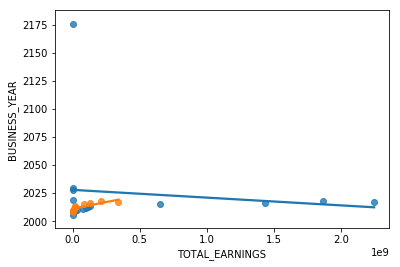

In [211]:
FEATURES = ['BUSINESS_YEAR']
TARGET = 'TOTAL_EARNINGS'

columns = list([TARGET])
columns.extend(FEATURES)

df_train = pd.read_csv('./csv/sales_history_train.csv', header = None, names = columns)
df_valid = pd.read_csv('./csv/sales_history_eval.csv', header = None, names = columns)

Plotting training and validation datasets :

In [ ]:
plot_train = sns.regplot(x = "TOTAL_EARNINGS", y = "BUSINESS_YEAR", ci = None, truncate = True, data = df_train)
plot_valid = sns.regplot(x = "TOTAL_EARNINGS", y = "BUSINESS_YEAR", ci = None, truncate = True, data = df_valid)

Defination of input function for both trainer and prediction, and make feature function :

In [208]:
def make_input_fn(df, num_epochs):
	return tf.estimator.inputs.pandas_input_fn(
		x = df,
		y = df[TARGET],
		batch_size = 128,
		num_epochs = num_epochs,
		shuffle = True,
		queue_capacity = 1000,
		num_threads = 1
	)

def make_prediction_input_fn(df, num_epochs):
	return tf.estimator.inputs.pandas_input_fn(
		x = df,
		y = None,
		batch_size = 128,
		num_epochs = num_epochs,
		shuffle = True,
		queue_capacity = 1000,
		num_threads = 1
	)

def make_feature_cols():
	input_columns = [tf.feature_column.numeric_column(k) for k in FEATURES]
	return input_columns

Implementation using Linear Regression :

In [209]:
# Using Linear Regression

tf.logging.set_verbosity(tf.logging.INFO)

OUTDIR = './pandas/linear/sales_history_trained'
shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time

model = tf.estimator.LinearRegressor(
	feature_columns = make_feature_cols(), model_dir = OUTDIR)

model.train(input_fn = make_input_fn(df_train, num_epochs = 10))

def print_rmse(model, name, df):
	metrics = model.evaluate(input_fn = make_input_fn(df, 1))
	print('RMSE on {} dataset = {}'.format(name, np.sqrt(metrics['average_loss'])))

print_rmse(model, 'validation', df_valid)

predictions = model.predict(input_fn = make_prediction_input_fn(df_valid, 5))
for i in range(5):
	print(next(predictions))

# End of Linear Regression

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './pandas/linear/sales_history_trained', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc2d77b9438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./pandas/linear/

Implementation using Deep Neural Network Regression :

In [210]:
# Using DNN

tf.logging.set_verbosity(tf.logging.INFO)

OUTDIR = './pandas/dnn/sales_history_trained'
shutil.rmtree(OUTDIR, ignore_errors = True)

model = tf.estimator.DNNRegressor(hidden_units = [32, 8, 2],
	feature_columns = make_feature_cols(), model_dir = OUTDIR)

model.train(input_fn = make_input_fn(df_train, num_epochs = 100));

print_rmse(model, 'validation', df_valid)

predictions = model.predict(input_fn = make_prediction_input_fn(df_valid, 5))
for i in range(5):
	print(next(predictions))

# End of DNN

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './pandas/dnn/sales_history_trained', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc32c974a20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./pandas/dnn/sales_